In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
from numpy.polynomial.polynomial import Polynomial

def fit_line(x, y1, y2, label1, label2):
    # Fit linear model for losses
    coefs1 = Polynomial.fit(x, y1, 1).convert().coef
    # Fit linear model for accs
    coefs2 = Polynomial.fit(x, y2, 1).convert().coef

    print(f"Linear fit for {label1}: y = {coefs1[1]:.4f} * x + {coefs1[0]:.4f}")
    print(f"Linear fit for {label2}: y = {coefs2[1]:.4f} * x + {coefs2[0]:.4f}")

config = json.load(open("config.json"))
N_CLASSES = config.get("N_CLASSES", 2)
N_POISONED_FLIENTS = config.get("N_POISONED_CLIENTS", 0)


Batch size 1:
Linear fit for Loss: y = 4.7357 * x + -0.0663
Linear fit for Accuracy: y = -0.9795 * x + 0.7264
Batch size 2:
Linear fit for Loss: y = 3.2556 * x + 0.0863
Linear fit for Accuracy: y = -1.0106 * x + 0.7539
Batch size 4:
Linear fit for Loss: y = 2.2477 * x + 0.0775
Linear fit for Accuracy: y = -1.1637 * x + 0.9074
Batch size 8:
Linear fit for Loss: y = 1.5841 * x + 0.0388
Linear fit for Accuracy: y = -1.2680 * x + 1.0999
Batch size 16:
Linear fit for Loss: y = 1.1758 * x + 0.0258
Linear fit for Accuracy: y = -1.1685 * x + 1.1989
Batch size 32:
Linear fit for Loss: y = 0.9448 * x + 0.0317
Linear fit for Accuracy: y = -0.9558 * x + 1.2134


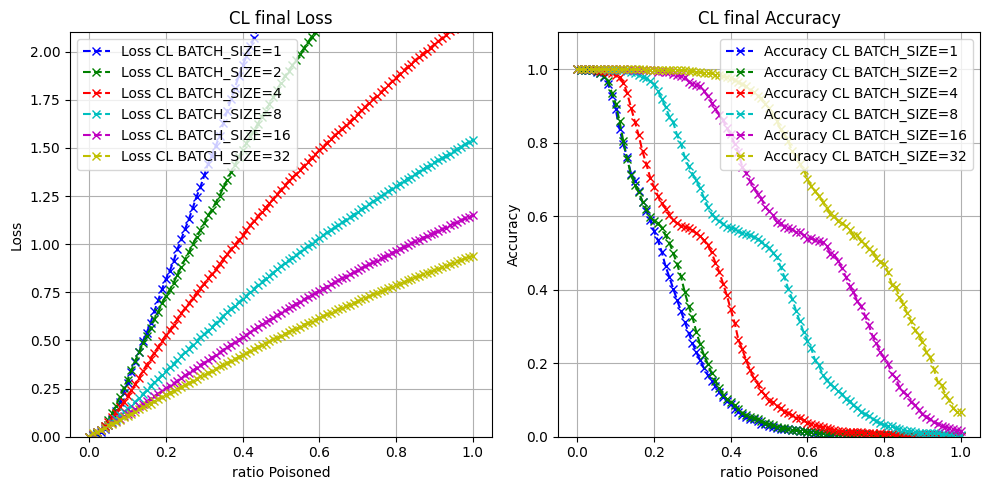

In [ ]:
df_list = []
line_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for batch_i in [1,2,4,8,16,32]:
    for i in range(101):
        try:
            csv_path = fr'results\CL_MODEL2_BATCH_SIZE{batch_i}\mnist_binary\poisoned_{i}\poisoned_{i}.csv'
            df = pd.read_csv(csv_path)
            df['poisoned'] = i
            df['batch_size'] = batch_i
            df = df[['batch_size','poisoned', 'loss', 'accuracy']]
            df_list.append(df.iloc[-1:, :])
        except Exception as e:
            df_list.append(pd.DataFrame({
                'batch_size': [batch_i],
                'poisoned': [i],
                'loss': [np.nan],
                'accuracy': [np.nan]
            }))
df_all = pd.concat(df_list, ignore_index=True)
df_all.to_csv(fr'results/CL_MODEL2_mnist_binary.csv', index=False)
# print(df_all)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharex=False)

# All records up to current
fit_df = df_all.replace([np.inf, -np.inf], np.nan).dropna(subset=['loss', 'accuracy'])
# print(fit_df)
for idx,batch_i in enumerate([1,2,4,8,16,32]):
    fit_df_batch = fit_df[fit_df['batch_size'] == batch_i]
    poisoned = fit_df_batch['poisoned'].to_numpy()/100
    losses = fit_df_batch['loss'].to_numpy()
    accs = fit_df_batch['accuracy'].to_numpy()
    print(f"Batch size {batch_i}:")
    fit_line(poisoned, losses, accs, 'Loss', 'Accuracy')

    ax1.plot(poisoned, losses, marker='x', color=line_colors[idx], linestyle='--', label='Loss CL_MODEL2 BATCH_SIZE='+str(batch_i))
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('ratio Poisoned')
    ax1.set_title('CL_MODEL2 final Loss')
    ax1.grid(True)
    ax1.set_ylim(0, 2.1)
    ax1.legend()

    ax2.plot(poisoned, accs, marker='x', color=line_colors[idx], linestyle='--', label='Accuracy CL_MODEL2 BATCH_SIZE='+str(batch_i))
    ax2.set_xlabel('ratio Poisoned')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('CL_MODEL2 final Accuracy')
    ax2.grid(True)
    ax2.set_ylim(0, 1.1)
    ax2.legend()

plt.tight_layout()
save_name_path = fr'results/CL_MODEL2_mnist_binary.jpg'
plt.savefig(save_name_path)

Batch size 1:
Linear fit for Loss: y = 4.7357 * x + -0.0663
Linear fit for Accuracy: y = -0.9794 * x + 0.7263
Batch size 2:
Linear fit for Loss: y = 3.2610 * x + 0.0765
Linear fit for Accuracy: y = -1.0183 * x + 0.7610
Batch size 4:
Linear fit for Loss: y = 2.2477 * x + 0.0734
Linear fit for Accuracy: y = -1.1680 * x + 0.9149
Batch size 8:
Linear fit for Loss: y = 1.5642 * x + 0.0353
Linear fit for Accuracy: y = -1.2481 * x + 1.1037
Batch size 16:
Linear fit for Loss: y = 1.2122 * x + 0.0405
Linear fit for Accuracy: y = -0.9186 * x + 1.0915
Batch size 32:
Linear fit for Loss: y = 1.0163 * x + 0.0573
Linear fit for Accuracy: y = -0.6076 * x + 1.0024


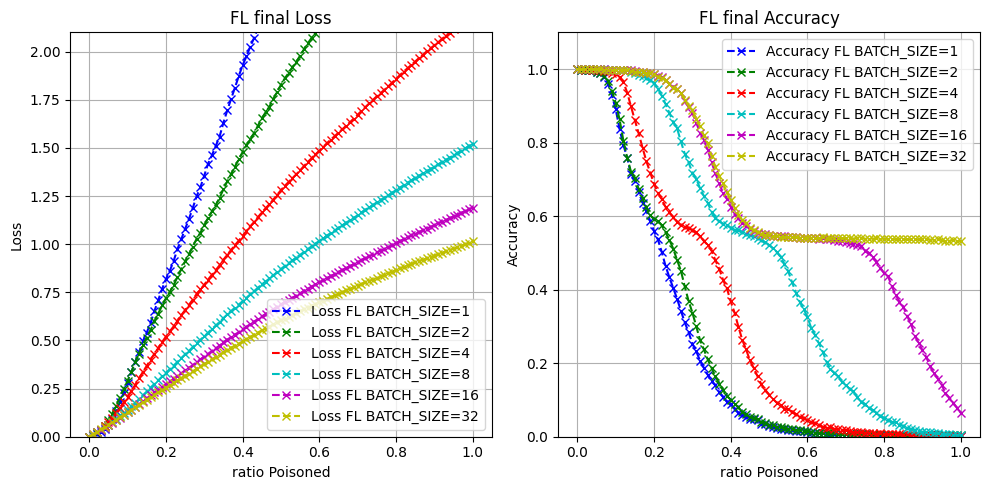

In [ ]:
df_list = []
line_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for batch_i in [1,2,4,8,16,32]:
    for i in range(101):
        try:
            csv_path = fr'results\FL_MODEL2_BATCH_SIZE{batch_i}\mnist_binary\poisoned_{i}\poisoned_{i}.csv'
            df = pd.read_csv(csv_path)
            df['poisoned'] = i
            df['batch_size'] = batch_i
            df = df[['batch_size','poisoned', 'loss', 'accuracy']]
            df_list.append(df.iloc[-1:, :])
        except Exception as e:
            df_list.append(pd.DataFrame({
                'batch_size': [batch_i],
                'poisoned': [i],
                'loss': [np.nan],
                'accuracy': [np.nan]
            }))
df_all = pd.concat(df_list, ignore_index=True)
df_all.to_csv(fr'results/FL_MODEL2_mnist_binary.csv', index=False)
# print(df_all)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharex=False)

# All records up to current
fit_df = df_all.replace([np.inf, -np.inf], np.nan).dropna(subset=['loss', 'accuracy'])
# print(fit_df)
for idx,batch_i in enumerate([1,2,4,8,16,32]):
    fit_df_batch = fit_df[fit_df['batch_size'] == batch_i]
    poisoned = fit_df_batch['poisoned'].to_numpy()/100
    losses = fit_df_batch['loss'].to_numpy()
    accs = fit_df_batch['accuracy'].to_numpy()
    print(f"Batch size {batch_i}:")
    fit_line(poisoned, losses, accs, 'Loss', 'Accuracy')

    ax1.plot(poisoned, losses, marker='x', color=line_colors[idx], linestyle='--', label='Loss FL_MODEL2 BATCH_SIZE='+str(batch_i))
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('ratio Poisoned')
    ax1.set_title('FL_MODEL2 final Loss')
    ax1.grid(True)
    ax1.set_ylim(0, 2.1)
    ax1.legend()

    ax2.plot(poisoned, accs, marker='x', color=line_colors[idx], linestyle='--', label='Accuracy FL_MODEL2 BATCH_SIZE='+str(batch_i))
    ax2.set_xlabel('ratio Poisoned')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('FL_MODEL2 final Accuracy')
    ax2.grid(True)
    ax2.set_ylim(0, 1.1)
    ax2.legend()

plt.tight_layout()
save_name_path = fr'results/FL_MODEL2_mnist_binary.jpg'
plt.savefig(save_name_path)